Dowload data from wandb

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!ls ../data

best.csv               mean.csv               output.txt
best_tree_executed.csv min.csv                size.csv
depth.csv              min_fitness.csv        std.csv


In [7]:
# neat_config = pd.read_csv('../data/wandb_export_2023-03-25T14_58_49.117+01_00.csv')
mean_fitness = pd.read_csv('../data/mean.csv').rename(columns={
    'helpful-butterfly-83 - mean_fitness': 'Mean fitness',
    'Step': 'Iteration'
}).drop(columns=['helpful-butterfly-83 - mean_fitness__MAX', 'helpful-butterfly-83 - mean_fitness__MIN'])
best_fitness = pd.read_csv('../data/best.csv').rename(columns={
    'helpful-butterfly-83 - best_fitness overall': 'Best fitness',
    'Step': 'Iteration'
}).drop(columns=['helpful-butterfly-83 - best_fitness overall__MAX', 'helpful-butterfly-83 - best_fitness overall__MIN'])
std_fitness = pd.read_csv('../data/std.csv').rename(columns={
    'helpful-butterfly-83 - std_fitness': 'Stdev fitness',
    'Step': 'Iteration'
}).drop(columns=['helpful-butterfly-83 - std_fitness__MAX', 'helpful-butterfly-83 - std_fitness__MIN'])
# median_fitness = pd.read_csv('../data/wandb_export_2023-03-25T15_01_11.824+01_00.csv').rename(columns={
#     'proud-forest-2 - median_fitness': 'Median fitness',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - median_fitness__MAX', 'proud-forest-2 - median_fitness__MIN'])
# nodes_number = pd.read_csv('../data/wandb_export_2023-03-25T15_00_48.526+01_00.csv').rename(columns={
#     'proud-forest-2 - nodes_number': 'Nodes number',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - nodes_number__MAX', 'proud-forest-2 - nodes_number__MIN'])
# enabled_connections_number = pd.read_csv('../data/wandb_export_2023-03-25T15_01_00.220+01_00.csv').rename(columns={
#     'proud-forest-2 - enabled_connections_number': 'Enabled connections',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - enabled_connections_number__MAX', 'proud-forest-2 - enabled_connections_number__MIN'])
# connections_number = pd.read_csv('../data/wandb_export_2023-03-25T15_01_04.543+01_00.csv').rename(columns={
#     'proud-forest-2 - connections_number': 'Connections number',
#     'Step': 'Iteration'
# }).drop(columns=['proud-forest-2 - connections_number__MAX', 'proud-forest-2 - connections_number__MIN'])

In [8]:
fitness = mean_fitness.merge(best_fitness).merge(std_fitness)
# node_stats = nodes_number.merge(enabled_connections_number).merge(connections_number)

In [9]:
fitness

,Iteration,Mean fitness,Best fitness,Stdev fitness
0,0,-468.319610,-87.234416,289.737675
1,1,-326.568510,-85.246698,207.179622
2,2,-304.931086,-78.968432,194.164072
3,3,-282.482113,-78.368432,178.222292
4,4,-285.926901,-75.068432,191.791128
...,...,...,...,...
995,995,-132.869546,291.145380,207.434326
996,996,-124.070218,291.145380,198.519279
997,997,-104.716909,291.145380,193.406574
998,998,-131.282161,291.145380,198.357574


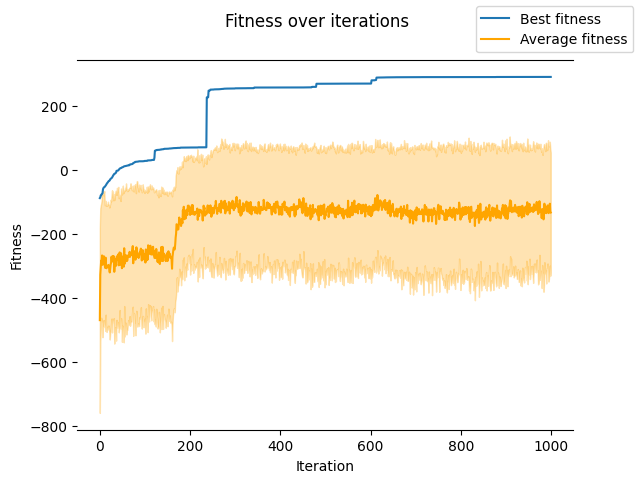

In [10]:
fig, ax = plt.subplots(1)
#ax2 = ax.twinx()
ax.plot(fitness.Iteration, fitness["Best fitness"], label='Best fitness')
ax.plot(fitness.Iteration, fitness["Mean fitness"], label='Average fitness', color='orange')
ax.fill_between(
    fitness.Iteration,
    fitness["Mean fitness"] - fitness["Stdev fitness"],
    fitness["Mean fitness"] + fitness["Stdev fitness"],
    color='orange',
    alpha=0.3
)
# ax.axhline(y = 200, color = 'g', linestyle = '-', label="Valid solution threshold")
ax.set_xlabel("Iteration")
ax.set_ylabel("Fitness")
ax.spines['right'].set_visible(False)
ax.spines['left'].set_visible(False)
# ax.set_ylim([-400, 300])
#ax2.set_ylabel("Average fitness")
fig.suptitle("Fitness over iterations")
fig.legend()
fig.savefig("../assets/images/fitness_over_iterations_frozenlake_bt.pdf", bbox_inches='tight')
plt.show()

In [ ]:
node_stats